<a href="https://colab.research.google.com/github/NikhilNamal17/ai-calorie-tracker/blob/master/Calorie_Tracker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:

import tensorflow as tf
import matplotlib.image as img
%matplotlib inline
import numpy as np
from collections import defaultdict
import collections
from shutil import copy
from shutil import copytree, rmtree
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import zipfile
import os
import random
import tensorflow.keras.backend as K
from tensorflow.keras import regularizers
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, AveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l2
from tensorflow import keras
from tensorflow.keras import models
import cv2

In [0]:
# Check if GPU is enabled
print(tf.__version__)
print(tf.test.gpu_device_name())

1.15.0
/device:GPU:0


In [0]:
#Unzipping file
with zipfile.ZipFile("drive/My Drive/datasets.zip","r") as zip_ref:
    zip_ref.extractall()

In [0]:
import glob
food = ['dosa','idli','pav_bhaji','samosa','vada_pav'] 

f_dosa = glob.glob('datasets/train_data_mc/Dosa/*')
f_idli = glob.glob('datasets/train_data_mc/Idli/*')
f_pav_bhaji = glob.glob('datasets/train_data_mc/Pav Bhaji/*')
f_samosa = glob.glob('datasets/train_data_mc/Samosa/*')
f_vada_pav = glob.glob('datasets/train_data_mc/Vada Pav/*')


f_dosa_test = glob.glob('datasets/test_data_mc/Dosa/*')
f_idli_test = glob.glob('datasets/test_data_mc/Idli/*')
f_pav_bhaji_test = glob.glob('datasets/test_data_mc/Pav Bhaji/*')
f_samosa_test = glob.glob('datasets/test_data_mc/Samosa/*')
f_vada_pav_test = glob.glob('datasets/test_data_mc/Vada Pav/*')


# total 1000 files for each category
print('Number of images per class:\n\t \ttrain\ttest \n Dosa:\t\t{}\t{}\n Idli:\t\t{}\t{}\n Pav Bhaji:\t{}\t{}\n Samosa:\t{}\t{}  \n Vada Pav:\t{}\t{}'
      .format(len(f_dosa),len(f_dosa_test),
              len(f_idli),len(f_idli_test),
              len(f_pav_bhaji),len(f_pav_bhaji_test),
              len(f_samosa),len(f_samosa_test),
              len(f_vada_pav),len(f_vada_pav_test)))

Number of images per class:
	 	train	test 
 Dosa:		464	204
 Idli:		299	163
 Pav Bhaji:	100	72
 Samosa:	240	189  
 Vada Pav:	84	64


In [0]:
K.clear_session()
n_classes = 5
img_width, img_height = 299, 299
train_data_dir = 'datasets/train_data_mc'
validation_data_dir = 'datasets/test_data_mc'
nb_train_samples = 2250 #75750
nb_validation_samples = 750 #25250
batch_size = 16

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')


inception = InceptionV3(weights='imagenet', include_top=False)
x = inception.output
x = GlobalAveragePooling2D()(x)
x = Dense(128,activation='relu')(x)
x = Dropout(0.2)(x)

predictions = Dense(5,kernel_regularizer=regularizers.l2(0.005), activation='softmax')(x)

model = Model(inputs=inception.input, outputs=predictions)
model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])
checkpointer = ModelCheckpoint(filepath='best_model_5class.hdf5', verbose=1, save_best_only=True)
csv_logger = CSVLogger('history_5class.log')

history = model.fit_generator(train_generator,
                    steps_per_epoch = nb_train_samples // batch_size,
                    validation_data=validation_generator,
                    validation_steps=nb_validation_samples // batch_size,
                    epochs=50,
                    verbose=1,
                    callbacks=[csv_logger, checkpointer])

model.save('model_trained_5class.hdf5')

Found 1183 images belonging to 5 classes.
Found 688 images belonging to 5 classes.
Epoch 1/50
 55/140 [==========>...................] - ETA: 54s - loss: 1.5284 - acc: 0.3455

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


 46/140 [========>.....................] - ETA: 20s - loss: 1.2453 - acc: 0.5489
Epoch 00001: val_loss improved from inf to 1.24531, saving model to best_model_5class.hdf5
140/140 [==============================] - 122s 869ms/step - loss: 1.3913 - acc: 0.4567 - val_loss: 1.2453 - val_acc: 0.5489
Epoch 2/50
 46/140 [========>.....................] - ETA: 18s - loss: 0.9476 - acc: 0.6780
Epoch 00002: val_loss improved from 1.24531 to 0.94764, saving model to best_model_5class.hdf5
140/140 [==============================] - 73s 523ms/step - loss: 1.0379 - acc: 0.6689 - val_loss: 0.9476 - val_acc: 0.6780
Epoch 3/50
 46/140 [========>.....................] - ETA: 18s - loss: 0.7392 - acc: 0.7609
Epoch 00003: val_loss improved from 0.94764 to 0.73920, saving model to best_model_5class.hdf5
140/140 [==============================] - 72s 512ms/step - loss: 0.7669 - acc: 0.7678 - val_loss: 0.7392 - val_acc: 0.7609
Epoch 4/50
 46/140 [========>.....................] - ETA: 19s - loss: 0.5772 - a

In [0]:
class_map_5 = train_generator.class_indices
class_map_5

{'Dosa': 0, 'Idli': 1, 'Pav Bhaji': 2, 'Samosa': 3, 'Vada Pav': 4}

In [0]:
def plot_accuracy(history,title):
    plt.title(title)
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train_accuracy', 'validation_accuracy'], loc='best')
    plt.show()
def plot_loss(history,title):
    plt.title(title)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train_loss', 'validation_loss'], loc='best')
    plt.show()


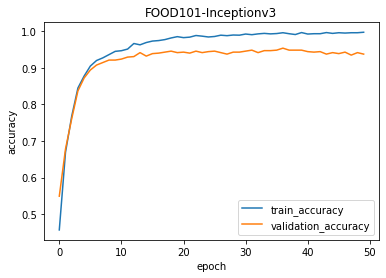

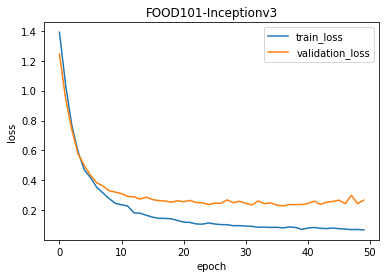

In [0]:
plot_accuracy(history,'FOOD101-Inceptionv3')
plot_loss(history,'FOOD101-Inceptionv3')

In [0]:
%%time
# Loading the best saved model to make predictions
K.clear_session()
model_best = load_model('best_model_5class.hdf5',compile = False)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
CPU times: user 7.15 s, sys: 75.3 ms, total: 7.22 s
Wall time: 7.2 s


In [0]:
food_list = ['dosa','idli','pav_bhaji','samosa','vada_pav'] 

def predict_class(model, images, show = True):
  for img in images:
    img = image.load_img(img, target_size=(299, 299))
    img = image.img_to_array(img)                    
    img = np.expand_dims(img, axis=0)         
    img /= 255.                                      

    pred = model.predict(img)
    index = np.argmax(pred)
    food_list.sort()
    pred_value = food_list[index]
    if show:
        plt.imshow(img[0])                           
        plt.axis('off')
        plt.title(pred_value)
        plt.show()

In [0]:
ind = np.random.randint(1,len(x_test),5)
f, ax=plt.subplots(1,5,figsize=(20,10))
for i,j in enumerate(ind):
    ax[i].imshow(x_test[j])
    ax[i].set_title("Pred :{}({:.2f})\nTrue :{}({:.2f})".format
                          (classtolabel[str(y_pred[j])],np.max(y_pred_conf[j]),
                           classtolabel[str(y_label[j])],y_pred_conf[j][(y_label[j])],fontweight="bold", size=20))

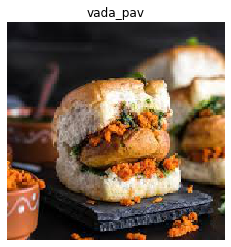

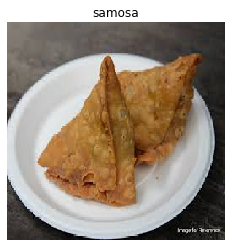

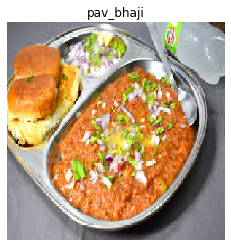

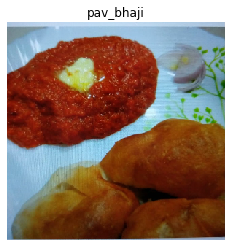

In [0]:
images = []
images.append('vadapav.jpg')
# images.append('dosa.jpg')
images.append('samosa.jpg') 
images.append('pavbhaji.jpg')
images.append('pavbhaji2.jpg')
# images.append('idli.jpg')
predict_class(model_best, images, True)